In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from datetime import datetime,date,timedelta

# Data Aggregation and Group Operations

In [3]:
df = DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
'key2' : ['one', 'two', 'one', 'two', 'one'],
'data1' : np.random.randn(5),
'data2' : np.random.randn(5)})
df

,data1,data2,key1,key2
0,-0.035504,-0.013821,a,one
1,-0.917456,-0.036665,a,two
2,-1.447780,-1.283298,b,one
3,0.596944,0.331841,b,two
4,0.968853,0.172837,a,one


In [5]:
grouped = df['data1'].groupby(df['key1'])
grouped.mean()

key1
a    0.005298
b   -0.425418
Name: data1, dtype: float64

In [6]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one     0.466674
      two    -0.917456
b     one    -1.447780
      two     0.596944
Name: data1, dtype: float64

In [7]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

California  2005   -0.917456
            2006   -1.447780
Ohio        2005    0.280720
            2006    0.968853
Name: data1, dtype: float64

In [8]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.005298,0.040784
b,-0.425418,-0.475728


In [11]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one  -0.356738  0.256191
     two   0.009188  1.901091
b    one  -0.948833  0.415823
     two  -0.517331 -1.424932

In [12]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

## Iterating over Group

In [15]:
for name, group in df.groupby('key1'): 
    print('#'*20)
    print(name)
    print('#'*20)
    print(group)

####################
a
####################
      data1     data2 key1 key2
0 -0.696114  0.048884    a  one
1  0.009188  1.901091    a  two
4 -0.017363  0.463498    a  one
####################
b
####################
      data1     data2 key1 key2
2 -0.948833  0.415823    b  one
3 -0.517331 -1.424932    b  two


In [9]:
for (k1, k2), group in df.groupby(['key1', 'key2']): 
    print('#'*20)
    print(k1,'-->',k2)
    print('#'*20)
    print(group)

####################
a --> one
####################
      data1     data2 key1 key2
0 -0.035504 -0.013821    a  one
4  0.968853  0.172837    a  one
####################
a --> two
####################
      data1     data2 key1 key2
1 -0.917456 -0.036665    a  two
####################
b --> one
####################
     data1     data2 key1 key2
2 -1.44778 -1.283298    b  one
####################
b --> two
####################
      data1     data2 key1 key2
3  0.596944  0.331841    b  two


In [10]:
pieces = dict(list(df.groupby('key1')))
pieces['b']

,data1,data2,key1,key2
2,-1.447780,-1.283298,b,one
3,0.596944,0.331841,b,two


In [11]:
grouped = df.groupby(df.dtypes, axis=1)
dict(list(grouped))

{dtype('float64'):       data1     data2
 0 -0.035504 -0.013821
 1 -0.917456 -0.036665
 2 -1.447780 -1.283298
 3  0.596944  0.331841
 4  0.968853  0.172837, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

## Selecting a Column or Subset of Columns

In [12]:
df.groupby('key1')['data1']   # df['data1'].groupby(df['key1'])
df.groupby('key1')[['data2']] # df[['data2']].groupby(df['key1'])

In [30]:
df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    one   0.079508
     two  -0.036665
b    one  -1.283298
     two   0.331841

In [28]:
people = DataFrame(np.random.randn(5, 5), 
                   columns=['a', 'b', 'c', 'd', 'e'],
                    index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.ix[2:3, ['b', 'c']] = np.nan # Add a few NA values
people

,a,b,c,d,e
Joe,-0.319196,-0.379575,-0.726325,-0.391755,0.601364
Steve,0.683443,0.182721,0.064583,0.950468,2.303815
Wes,0.010205,NaN,NaN,-0.320936,0.683820
Jim,-1.034953,1.871680,-1.285755,1.912071,-0.733705
Travis,1.094651,-0.131071,2.191913,-0.645316,0.119788


In [27]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}
by_column = people.groupby(mapping, axis=1)
by_column.sum()

,blue,red
Joe,1.959586,-0.098331
Steve,2.090241,-0.856750
Wes,0.327199,-0.097508
Jim,-1.404137,-0.601427
Travis,1.185269,-0.093633


In [16]:
people.groupby(len).sum()

,a,b,c,d,e
3,-2.288223,1.472236,0.238745,0.643904,0.018720
5,-1.917070,-0.149776,1.273724,0.816517,1.210096
6,0.139517,-1.106320,0.135249,1.050020,0.873171


In [35]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
[1, 3, 5, 1, 3]], names=['cty', 'tenor'])
hier_df = DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      0.533503  0.519281 -1.538807 -0.960087  0.205893
1      1.300910  0.048730  0.318288  0.762175 -0.214549
2      0.625865 -1.471990  0.710091 -1.725323 -0.432584
3     -0.740201 -0.698656 -1.240574  0.381454  0.889499

In [36]:
hier_df['US'][1]

0    0.533503
1    1.300910
2    0.625865
3   -0.740201
Name: 1, dtype: float64

In [37]:
#hier_df['US'][1][0] = np.NAN
hier_df.ix[0, ['US']]

cty  tenor
US   1        0.533503
     3        0.519281
     5       -1.538807
Name: 0, dtype: float64

In [38]:
nums = np.random.randn(4,5)

In [39]:
nums

array([[ 0.30898367, -0.23784955, -0.21913037, -0.63984025, -1.41781734],
       [-0.92798883, -0.73093326,  0.22981395,  0.44668943,  0.28910032],
       [ 1.41721511, -0.26119927,  0.9390174 ,  1.59541   ,  0.29983107],
       [ 1.42016047,  0.14280104,  2.00210583,  0.87785686, -1.28353882]])

In [40]:
nums[0][0] == np.NAN

False

In [42]:
nums[0][0] == np.NAN
nums[3][0] == np.NAN
nums[0][3] == np.NAN
nums[3][3] == np.NAN

False

In [43]:
hier_df.groupby(level='cty', axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


## Data Aggregation

In [24]:
df

,data1,data2,key1,key2
0,-0.696114,0.048884,a,one
1,0.009188,1.901091,a,two
2,-0.948833,0.415823,b,one
3,-0.517331,-1.424932,b,two
4,-0.017363,0.463498,a,one


In [46]:
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)

key1
a    0.767981
b    0.392471
Name: data1, dtype: float64

In [47]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,1.886309,0.209501
b,2.044724,1.615139


In [48]:
tips = pd.read_csv('ch08/tips.csv')   ###### Change the Path
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.head()

FileNotFoundError: File b'ch08/tips.csv' does not exist

## Column-wise and Multiple Function Application

In [ ]:
grouped = tips.groupby(['sex', 'smoker'])
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

In [ ]:
grouped_pct.agg(['mean','std', peak_to_peak])

In [ ]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

In [ ]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

In [ ]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)

In [ ]:
#

In [ ]:
import pandas as pd

In [54]:
us_election = pd.read_csv('/Users/wuyan/Documents/courses/2016 fall/python/DataAnalysisPython/usa-2016-presidential-election-by-county.csv', error_bad_lines = False, sep=';') 

In [ ]:
# get how many records in the file without opening the file

In [55]:
us_election.head()

,State,ST,Fips,County,precincts,Atwood F,Castle D,Clinton H,Copeland S,De la fuente R,...,autumn_TMIN,nearest_county,temp,precip,temp_bins,lat_bins,lon_bins,precip_bins,elevation_bins,Geo Shape
0,Tennessee,TN,47097,Lauderdale,13,NaN,NaN,3656,NaN,14.0,...,501.5,47097.0,15.583333,1269.746,"14.9, 16.6","35.7610127807, -89.6314442099","(-90.4,-87.2]","(1.19e+03,1.27e+03]","(38.9,105]","{""type"": ""Polygon"", ""coordinates"": [[[-89.7207..."
1,Tennessee,TN,47101,Lewis,9,NaN,NaN,890,NaN,14.0,...,458.0,47101.0,14.444444,1432.306,"13.6, 14.9","35.5272807279, -87.4930956179","(-90.4,-87.2]","(1.39e+03,4.3e+03]","(259,317]","{""type"": ""Polygon"", ""coordinates"": [[[-87.6577..."
2,Tennessee,TN,47107,McMinn,15,NaN,NaN,3507,NaN,50.0,...,462.0,47107.0,14.277778,1413.002,"13.6, 14.9","35.4247463804, -84.6174739083","(-87.2,-84.5]","(1.39e+03,4.3e+03]","(259,317]","{""type"": ""Polygon"", ""coordinates"": [[[-84.7365..."
3,Tennessee,TN,47127,Moore,5,NaN,NaN,496,NaN,7.0,...,465.0,47127.0,14.416667,1455.420,"13.6, 14.9","35.2846174075, -86.3587711193","(-87.2,-84.5]","(1.39e+03,4.3e+03]","(259,317]","{""type"": ""Polygon"", ""coordinates"": [[[-86.3677..."
4,Tennessee,TN,47137,Pickett,9,NaN,NaN,536,NaN,1.0,...,449.0,47137.0,13.500000,1371.346,"12.0, 13.6","36.5584092606, -85.0749897491","(-87.2,-84.5]","(1.27e+03,1.39e+03]","(259,317]","{""type"": ""Polygon"", ""coordinates"": [[[-85.2132..."


In [ ]:
# average number of votes every state

In [59]:
candidates_df = us_election[['ST','Clinton H', 'Johnson G', 'Stein J', 'Trump D']]

In [60]:
candidates_df.head()

,ST,Clinton H,Johnson G,Stein J,Trump D
0,TN,3656,87,14.0,4884
1,TN,890,59,42.0,3579
2,TN,3507,339,69.0,14673
3,TN,496,71,17.0,2325
4,TN,536,36,7.0,2019


In [64]:
candidates_df.ST.unique()

array(['TN', 'TX', 'UT', 'AL', nan, 'AZ', 'AR', 'CA', 'CO', 'CT', 'FL',
       'GA', 'PA', 'RI', 'SC', 'SD', 'ID', 'IL', 'NC', 'VT', 'VA', 'KY',
       'MT', 'NE', 'NV', 'NH', 'ND', 'OH', 'OK', 'WV', 'WI', 'WY', 'KS',
       'MS', 'MO', 'OR', 'HI', 'NJ', 'NM', 'NY', 'IN', 'WA', 'LA', 'IA',
       'DE', 'ME', 'MD', 'MA', 'MI', 'MN', 'DC'], dtype=object)

In [70]:
small_candidates_df = candidates_df[candidates_df.ST.isin(candidates_df.ST.unique()[-10:])]

In [71]:
small_candidates_df.head()

,ST,Clinton H,Johnson G,Stein J,Trump D
790,WA,6021,959,192.0,14947
791,WA,18728,1861,658.0,16104
792,WA,11472,639,602.0,5518
793,WA,44680,4706,1133.0,32563
794,WA,5224,486,172.0,7136


In [ ]:
groupBy() ['ST','Clinton H', 'Johnson G', 'Stein J', 'Trump D']

In [72]:
candidates_votes = small_candidates_df.groupby('ST').sum()

In [79]:
candidates_votes = candidates_votes.reset_index()

In [82]:
candidates_votes.head()

,ST,Clinton H,Johnson G,Stein J,Trump D
0,DC,260223,4501,3995.0,11553
1,DE,235581,14751,6100.0,185103
2,IA,650790,57322,11119.0,798923
3,LA,779535,37950,14018.0,1178004
4,MA,1964768,136784,46910.0,1083069


In [110]:
import seaborn as sns
%matplotlib inline

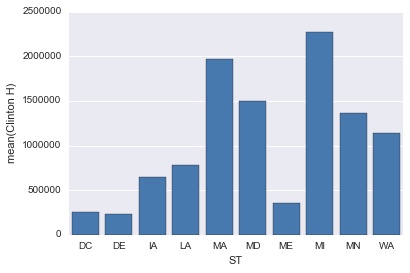

In [113]:
sns.barplot(x = 'ST', y = 'Clinton H', data = candidates_votes, color = '#3778bf')
#sns.barplot(x = 'ST', y = 'Trump D', data = candidates_votes, color = '#3778bf')

In [98]:
single_candidates = candidates_votes[['ST', 'Clinton H']].rename(columns={'Clinton H': 'votes'})
single_candidates['name'] = 'Clinton H'

In [105]:
all_candidate = []
for can_name in 'Clinton H', 'Johnson G', 'Stein J', 'Trump D':
    single_candidate = candidates_votes[['ST', can_name]].rename(columns= {can_name:'votes'})
    single_candidate['name'] = can_name
    all_candidate.append(single_candidate)
final_candidate_df = pd.concat(all_candidate)

In [106]:
all_candidate[0]

,ST,votes,name
0,DC,260223,Clinton H
1,DE,235581,Clinton H
2,IA,650790,Clinton H
3,LA,779535,Clinton H
4,MA,1964768,Clinton H
5,MD,1497951,Clinton H
6,ME,352485,Clinton H
7,MI,2267373,Clinton H
8,MN,1364067,Clinton H
9,WA,1145821,Clinton H


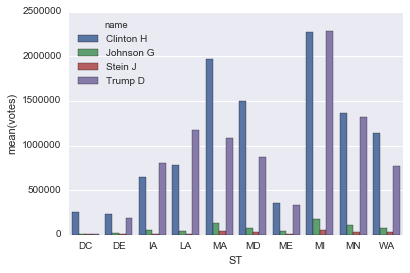

In [112]:
sns.barplot(x = 'ST', y = 'votes', hue = 'name', data=final_candidate_df)